In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv as read
from pandas import DataFrame
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
data = read("C:/Users/danil/Downloads/WINE.csv", delimiter=",")
test=read("C:/Users/danil/Downloads/TEST.csv", delimiter=",")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 18 columns):
Index       5600 non-null int64
Target      5600 non-null int64
Type        5600 non-null object
Alcohol     5600 non-null float64
Density     5600 non-null float64
Nitrogen    5600 non-null float64
pH          5600 non-null float64
Sugar       5600 non-null float64
A           5567 non-null float64
B           5600 non-null float64
C           5600 non-null float64
D           5600 non-null float64
Di          5600 non-null float64
E           5600 non-null float64
H           5584 non-null float64
S           5600 non-null float64
U           5600 non-null float64
V           5600 non-null float64
dtypes: float64(15), int64(2), object(1)
memory usage: 787.6+ KB


In [30]:
#Можно увидеть, что в стобцах A, H содержаться пустые значения, необходимо избавиться от них. Заполним пустые значения срадним значением для каждого из столбца.
mean = data['A'].mean()
data['A'].fillna(mean, inplace=True)
mean = data['H'].mean()
data['H'].fillna(mean, inplace=True)
#В столбце Type находятся переменные с типом данных Object. При просмотре выборки можно увидеть, что переменные в данном столбце могут принмать только два значения: red_wine и white_wine.  Так как обучение модели при наличии категориальных значений невозможно, то необходимо их закодировать.  
dct= {'white_wine':1, 'red_wine':2}
data['Type']=data['Type'].map(dct)
test['Type']=test['Type'].map(dct)
data.info()
#Из данной таблицы можно увижеть, что все пустые значения были заполнены, а так же переменные типа Object были переконвертированны в тип данных int64, что дает возмонжость обучать модель по данной выборке.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5600 entries, 0 to 5599
Data columns (total 18 columns):
Index       5600 non-null int64
Target      5600 non-null int64
Type        5600 non-null int64
Alcohol     5600 non-null float64
Density     5600 non-null float64
Nitrogen    5600 non-null float64
pH          5600 non-null float64
Sugar       5600 non-null float64
A           5600 non-null float64
B           5600 non-null float64
C           5600 non-null float64
D           5600 non-null float64
Di          5600 non-null float64
E           5600 non-null float64
H           5600 non-null float64
S           5600 non-null float64
U           5600 non-null float64
V           5600 non-null float64
dtypes: float64(15), int64(3)
memory usage: 787.6 KB


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,5600.0,2799.500000,1616.725085,0.00,1399.75,2799.500,4199.25,5599.00
Target,5600.0,3.812143,0.864077,1.00,3.00,4.000,4.00,6.00
Type,5600.0,1.245000,0.430126,1.00,1.00,1.000,1.00,2.00
Alcohol,5600.0,8.337791,0.591844,7.10,7.85,8.250,8.75,10.55
Density,5600.0,1.039718,0.457331,1.01,1.01,1.020,1.02,10.21
Nitrogen,5600.0,5.250179,3.698764,0.00,2.74,4.450,6.86,30.72
pH,5600.0,3.427979,0.165377,2.91,3.32,3.420,3.53,4.24
Sugar,5600.0,5.598030,4.541530,0.97,2.11,3.250,8.19,62.91
A,5600.0,24.539752,2.565825,17.70,22.90,24.100,25.50,41.90
B,5600.0,3.421563,2.155710,0.00,1.98,2.770,4.22,16.50


(array([  25.,    0.,  183.,    0., 1858.,    0., 2445.,    0.,  931.,
         158.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

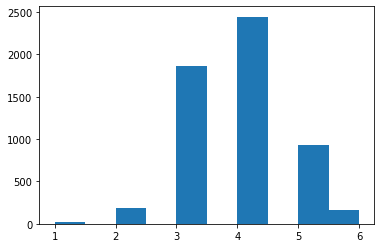

In [32]:
y=data.iloc[:,1]
X=data.iloc[:,2:18]
plt.hist(y)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CFFDDB4E0>,
      dtype=object)

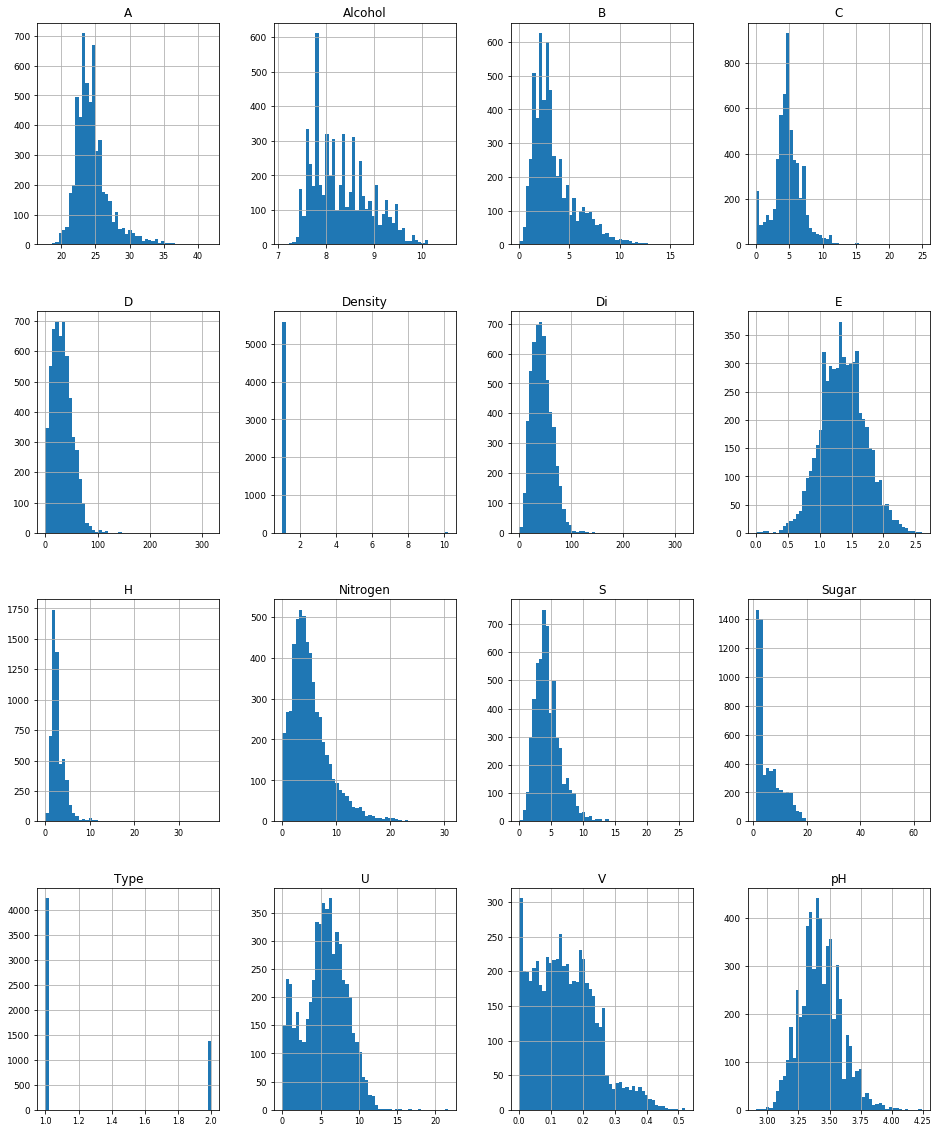

In [5]:
.X.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=9)
#По приведенным ниже графикам можно увидеть, что практически все признаки имеют нормальное распределние.
#Рассмотрим, как признаки коррелируют друг с другом, для этого построим матрицу корреляции.

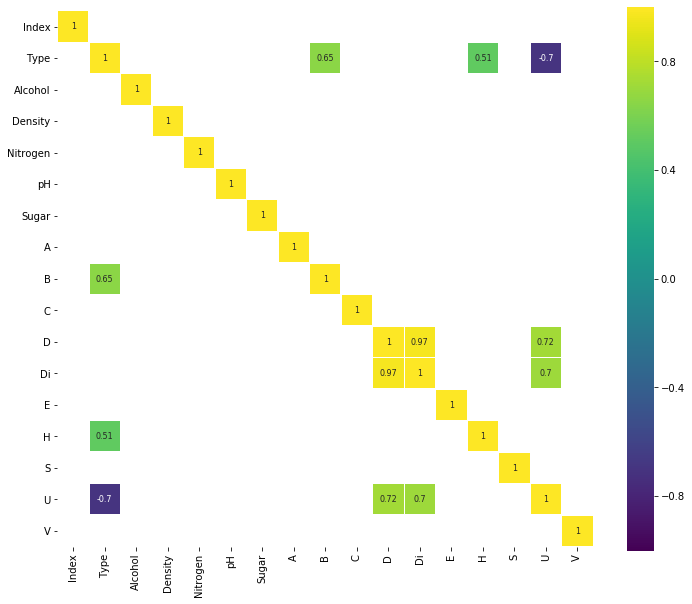

In [11]:
corr = data.drop('Target', axis=1).corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
#Исходя их матрцв корреляци, можно увидеть, что признаки Di и D практически очень хорошо коррелируют друг с другом, поэтому они могут быть скомбинированы вмессте для того, чтобы уменьшить количество признаков.
#Так же хорошо коррелируют признаки B и Type, U и D, и соответсвенно U и Di. Строго негативную корреляцию имеют U и Type.

In [33]:
#Рассмотрим, как исходные признаки коррелируют с целевой функцией Target.
data_corr = data.corr()['Target'][2:]
features_list = data_corr.sort_values(ascending=False)
print("There is {} strongly correlated values with Target:\n{}".format(len(features_list), features_list))
#Из полученных коэффициентов корееляции можно сделать вывод, практически все признаки имеют очень низкое значение коэффициента корреляции. Это говорит о том целевая фунция очень слабо связаны с данными признаками.
#Немного большую, однако все равно слабую зависимость имеет целевая функция со свойством Alcohol. 

There is 16 strongly correlated values with Target:
Alcohol     0.443372
E           0.088247
C           0.080364
D           0.053842
Di          0.052710
S           0.032989
pH          0.014953
Density    -0.017056
Nitrogen   -0.020498
V          -0.024634
Sugar      -0.034612
U          -0.044035
A          -0.084444
Type       -0.123147
H          -0.205618
B          -0.265365
Name: Target, dtype: float64


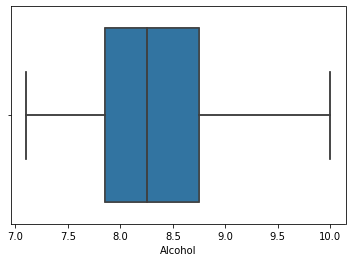

In [39]:
#Для большей точности обучения модели необходимо проверить выборку на выбросы.При наличии выбросов- заменить текущие значения на средние значения по столбцу.
sns.boxplot(x=X['Alcohol'])
#Из графика можно увидеть, что выбросы находятся в промежутке Alcohol > 10. Заменим значения.
X[X['Alcohol']>10]=X['Alcohol'].mean()
sns.boxplot(x=X['Alcohol'])


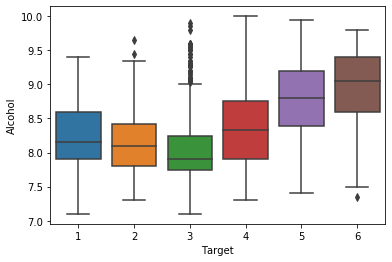

In [40]:
sns.boxplot(x=y, y=X["Alcohol"])
#Из боксплотов можно увидеть, что значения свойства Alcohol для классов 5 и 6, а так же 1,2,4 схожи между собой. 
#Наименьший порядок значений имеет класс 3. Так же можно заметить, что в классе 3 содержится сильный разброс значений признака, что может быть причиной плохой классификации. 

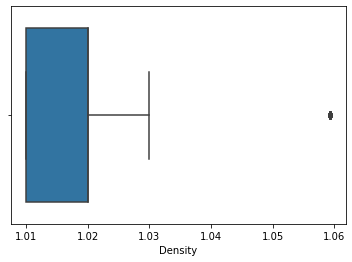

In [42]:
#Аналогичные действия сделаем для остальных столбцов
sns.boxplot(x=X['Density'])
X[X['Density']>1.05]=X['Density'].mean()


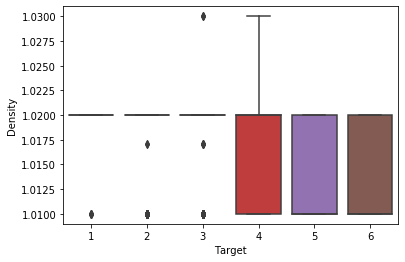

In [43]:
sns.boxplot(x=y, y=X["Density"])
#Все значения данного свойства имеют примерно одинаковый порядок значений для всех классов.

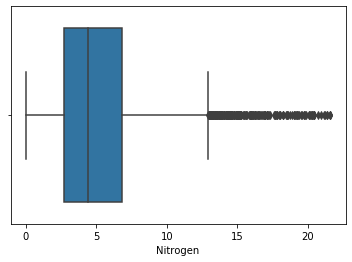

In [45]:
sns.boxplot(x=X['Nitrogen'])
X[X['Nitrogen']>22]=X['Nitrogen'].mean()

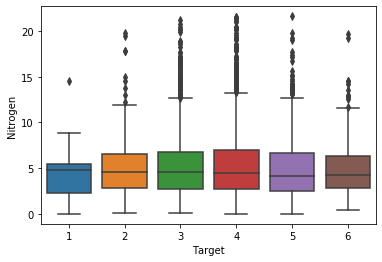

In [46]:
sns.boxplot(x=y, y=X["Nitrogen"])
#Все значения данного свойства имеют примерно одинаковый порядок для всех классов, однако в классах 2-5 имеет место большой разброс значений.

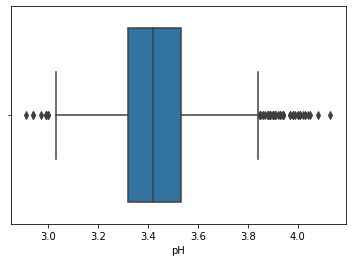

In [48]:
sns.boxplot(x=X['pH'])
X[X['pH']>4.2]=X['pH'].mean()
X[X['pH']<2]=X['pH'].mean()

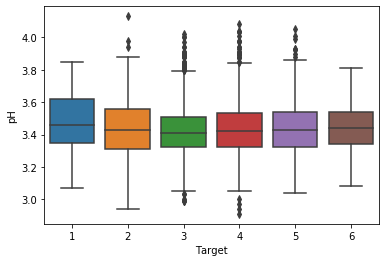

In [49]:
sns.boxplot(x=y, y=X["pH"])
#Все значения данного свойства имеют примерно одинаковый порядок для всех классов, однако в классах 3,4 имеет место большой разброс значений.

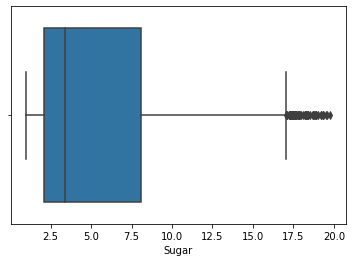

In [51]:
sns.boxplot(x=X['Sugar'])
X[X['Sugar']>20]=X['Sugar'].mean()

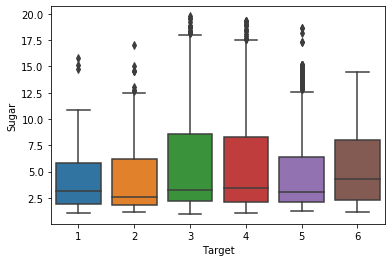

In [52]:
sns.boxplot(x=y, y=X["Sugar"])
#Наибольшие значения данного свойства содержаться в классе 3 и 4.

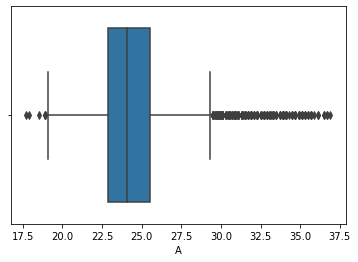

In [54]:
sns.boxplot(x=X['A'])
X[X['A']>37]=X['A'].mean()
X[X['A']<15]=X['A'].mean()

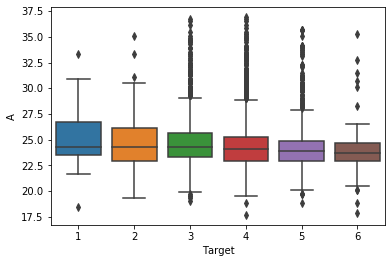

In [55]:
sns.boxplot(x=y, y=X["A"])
#Все значения данного свойства имеют примерно одинаковый порядок для всех классов, однако в классах 3-5 имеет место большой разброс значений.

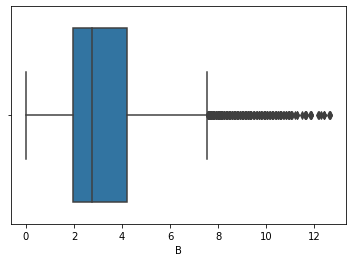

In [57]:
sns.boxplot(x=X['B'])
X[X['B']>13]=X['B'].mean()

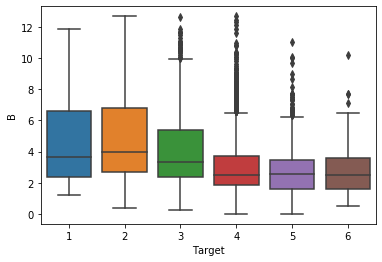

In [58]:
sns.boxplot(x=y, y=X["B"])
#Порядок значений для классов 1-3 больше, чем для остальных классов.

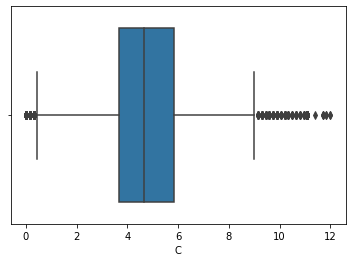

In [60]:
sns.boxplot(x=X['C'])
X[X['C']>12]=X['C'].mean()

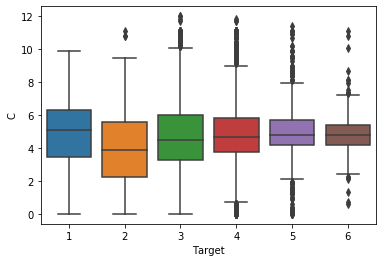

In [61]:
sns.boxplot(x=y, y=X["C"])

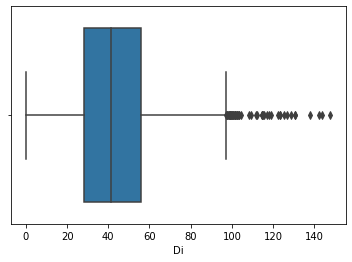

In [63]:
sns.boxplot(x=X['Di'])
X[X['Di']>150]=X['Di'].mean()

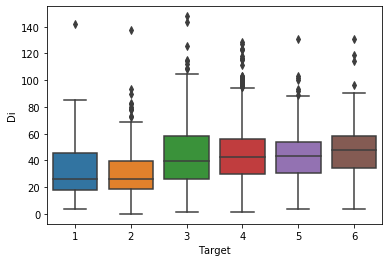

In [64]:
sns.boxplot(x=y, y=X["Di"])
#В каждом из классов содержаться выбросы, что может плохо сказаться на обучении модели классификации. 

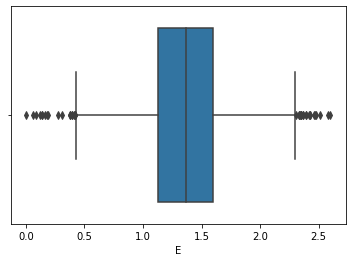

In [66]:
#Аналогично для остальных признаков
sns.boxplot(x=X['E'])
X[X['E']>3]=X['E'].mean()

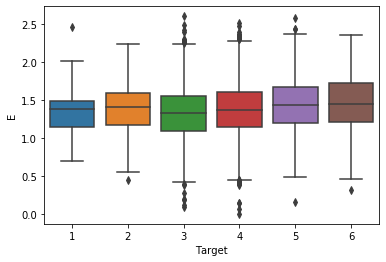

In [67]:
sns.boxplot(x=y, y=X["E"])

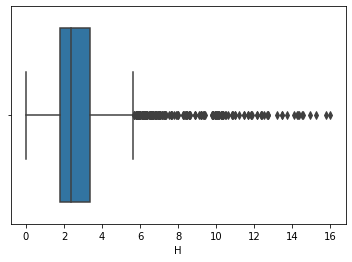

In [72]:
sns.boxplot(x=X['H'])
X[X['H']>16]=X['H'].mean()

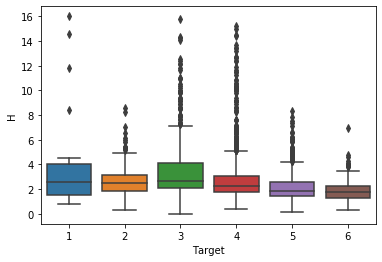

In [73]:
sns.boxplot(x=y, y=X["H"])

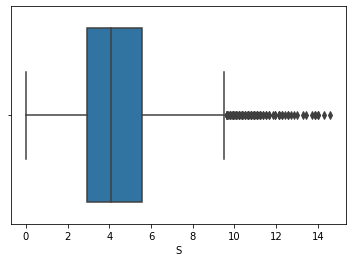

In [75]:
sns.boxplot(x=X['S'])
X[X['S']>15]=X['S'].mean()

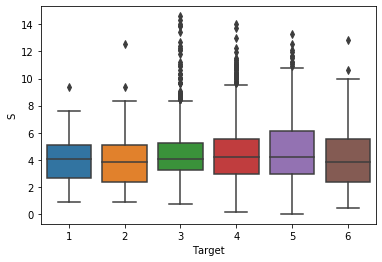

In [77]:
sns.boxplot(x=y, y=X["S"])

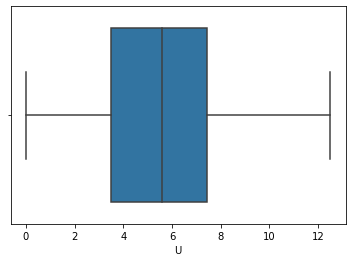

In [79]:
sns.boxplot(x=X['U'])
X[X['U']>12.5]=X['U'].mean()

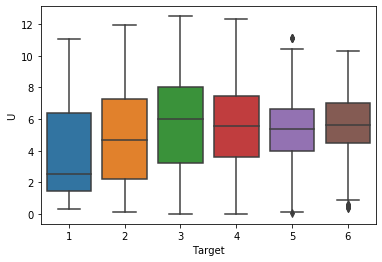

In [80]:
sns.boxplot(x=y, y=X["U"])

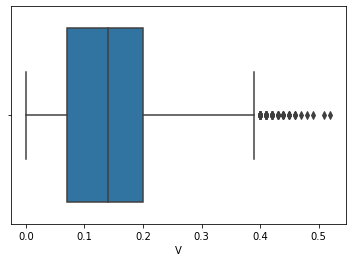

In [82]:
sns.boxplot(x=X['V'])
X[X['V']>1]=X['V'].mean()

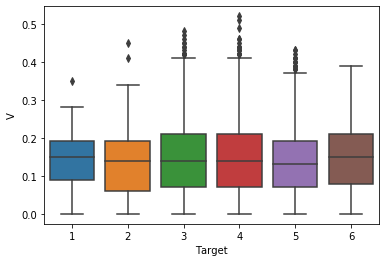

In [83]:
sns.boxplot(x=y, y=X["V"])

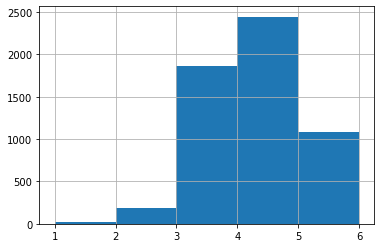

In [84]:
y.hist(bins=5)
#Из данного графика можно увидеть, что классы несбалансированы, то есть 1 и 2 классу соответствует гордаздо меньше наблюдений, чем остальным классам.
#Одним из решений данной проблемы явялется сэмплинг данных (то есть генерация искусственных наблюдений). Для этого воспользуемся алгоритом SMOTE.

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [86]:
#Для оценки модели, обученной на выборке, которая имеет проблему несбалансированных классов, используется метрика F1.
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
knn2= KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
knn2.fit(X_train, y_train)
y_pred = knn2.predict(X_test)
report = classification_report(y_test, knn2.predict(X_test), target_names=['1', '2','3','4','5','6'])
print(report)
#Можно увидеть, что данная метрика имееть слишком маленькое значение, это связано с тем, что алгоритм KNN очень плохо классифицирует на несбалансированных выборках.

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.30      0.25      0.28        55
           3       0.51      0.48      0.50       557
           4       0.50      0.54      0.52       734
           5       0.34      0.33      0.34       279
           6       0.16      0.17      0.16        47

    accuracy                           0.46      1680
   macro avg       0.30      0.30      0.30      1680
weighted avg       0.46      0.46      0.46      1680



In [92]:
#Проверим, как будет работать алгоритм Random Forest.
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
report = classification_report(y_test, rfc.predict(X_test), labels=np.unique(y_pred))
print(report)
#Точность данного классификатора выше, чем предыдущего, однако все равно мала.
#Это связано с проблемой несбалансированных классов, так как по ниже приведенной матрице можно увидеть, что лучше всего классифицируются экземпляры классов 4,5,6, так как их больше, чем остальных классов.
#Худше всего классифицируется класс 1 (так как именно содержит наименьшее число экземпляров).
#Появляется необходимость в балансировке классов. Это будет сделано с помощью сэмплирования данных.

              precision    recall  f1-score   support

           2       1.00      0.02      0.04        55
           3       0.67      0.71      0.69       557
           4       0.61      0.74      0.67       734
           5       0.67      0.46      0.54       279
           6       1.00      0.19      0.32        47

   micro avg       0.64      0.64      0.64      1672
   macro avg       0.79      0.42      0.45      1672
weighted avg       0.66      0.64      0.62      1672



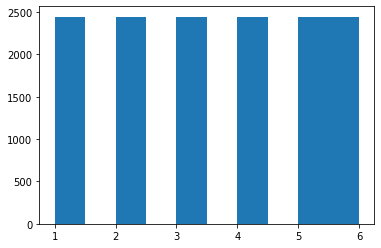

In [95]:
smt = SMOTE()
X, y = smt.fit_sample(X, y)
plt.hist(y)
#По данной диаграмме можно увидеть, что классы стали сбалансированы, что дает возмонжость более точно обучаться модели.
#Последним этапом обработки данных является нормализация данных. Исследуя данные, можно заметить, что значения разных столбцов имеют разные порядки. Это проблема может плохо отобразиться на обучении, а в дальнейшем на точности классификации.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
#Первой моделью классифкации была выбран RandomForestClassifier. Этот алгоритм явялется самым мощным, по сравнению со всеми остальными. Так же он хорошо справялется с большим количеством свойств и классов.
#Для проверки точности классификации был выбран метод кросс-валидации. Полученная средняя точность показывает, насколько хорошо классифицирует обученная модель.
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(n_estimators=300,random_state=0, n_jobs=-1)
all_accuracies = cross_val_score(estimator=classifier, X=X, y=y, cv=10)
print(all_accuracies)
#Можно заметить, что точность классификации достаточно высока, однако для того, чтобы найти максимальную точность классифкации данной модели- небоходимо настроить ее параметры.

[0.84557823 0.84965986 0.85510204 0.82108844 0.8707483  0.86202186
 0.875      0.87704918 0.87226776 0.90027322]


In [40]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param_grid = {'n_estimators': [300], 'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}
best_rfc = GridSearchCV(rfc, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
best_rfc.fit(X, y)
print (best_rfc.best_params_)
print (best_rfc.best_estimator_)
print (best_rfc.best_score_)

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8595773687798227


In [97]:
#На практике было исследовано, что наиболее точным классифкатором после RandomForest стал KNN. Учитывая то, что алгоритм KNN считается наиболее простым алгоритмом классификации- точность прогнозрования обученной модели достаточно высока.
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
all_accuracies = cross_val_score(knn, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print(all_accuracies)
#Необходимо подобрать самые оптимальные параметры для данного классификатора.

[0.73537415 0.70068027 0.7462585  0.69795918 0.74557823 0.75478142
 0.75819672 0.77937158 0.79234973 0.80601093]


In [33]:
param_grid = {'n_neighbors' : list(range(1,31)), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
best_knn = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy', n_jobs=-1)
best_knn.fit(X,y)
print (best_knn.best_params_)
print (best_knn.best_estimator_)
print (best_knn.best_score_)
#Полученная точность классификаци оказалась достаточно высока, однако все равно она меньше, чем точность классификации модели Random Forest. 
#Поэтому расклассифицируем тестовую выборку с помощью Random Forest Classifier.

{'n_neighbors': 2, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')
0.8107021131561009


In [61]:
X_test= test.values[::, 1:17]
result= pd.DataFrame({'Index': test['Index'].ravel()})
rfc=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X,y)
result['Target'] = rfc.predict(X_test)
result.to_csv('C:/Users/danil/Downloads/Sample_submission.csv', sep='\t')
#Вывод
#В ходе выполнения данного тестового задания был произведен анализ, обработка и классификация исходных данных. 
#В ходе исследования, было обнаружено, что исходная выборка содержит пропущенные, категорильные значения, а также выбросы. 
#Для более точного обучения пропущенные значения и выбросы были заменены на средние значения по каждому столбцу, категориальные значения- на соотвествующие порядковые номера. 
#Стоит отметить, что не все выбросы были заменены, а только те, которые имеют наибольшее отклонение от нормальной величины так как это могло привести к потере информативности признака.
#После исследовательской работы со свойствам- была проделана работа с целевой функцией. Классы, определяющие целевую функцию, оказались несбалансированы и это могло значительно понизить точность классификации.
#После разделения выборки на обучающую и тестовую и оценки полученной модели, было доказано, что проблема несбалансированных данных значительно сказывается на точности классификаци.
#Для решения данной проблемы был использован сэмплинг данных (а именно алгоритм SMOTE), который преобразовал данные в сбалансированный вид. 
#Последним этапом обработки данных стало нормирование данных, это также существенно повлияло на точность классифкации данных. 
#Для оценки точности данных был выбран метод кросс-валидации и метрика accuracy. Исходя из результатов точности был найдены два самых точных алгоритма: Random Forest и KNN.
#После оптимизации параметров для алгоритма KNN была найдена наивысшая точность классифкации, однако в связи с органиченными возможностями ноутбука самые оптимальные параметры для метода Random Forest были получены только для части параметров. 